In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re

from sklearn.model_selection import KFold

 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor

from numpy import mean
import scipy
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
available_ip = pd.read_csv('available_input_corr.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output_corr.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_ip

Year  Month  Count  daily_mean_celsius  average_relative_hummidity  \
0     2010      1   54.0                 8.1                        62.6   
1     2010      2   54.0                 8.3                        48.8   
2     2010      3   54.0                10.2                        52.7   
3     2010      4   14.0                12.1                        54.1   
4     2010      5   14.0                14.8                        59.5   
...    ...    ...    ...                 ...                         ...   
1831  2022      5   21.0                14.8                        59.5   
1832  2022      6   21.0                17.6                        66.7   
1833  2022      7   21.0                19.5                        56.2   
1834  2022      8   21.0                19.2                        73.3   
1835  2022      9   21.0                17.0                        59.5   

      Country_Belgium  Country_France  Country_Germany  Country_Italy  \
0                   1               0                0              0   
1                   1               0                0              0   
2                   1               0                0              0   
3                   1               0                0              0   
4                   1               0                0              0   
...               ...             ...              ...            ...   
1831                0               0                0              0   
1832                0               0                0              0   
1833                0               0                0              0   
1834                0               0                0              0   
1835                0               0                0              0   

      Country_Netherlands  Country_Poland  Country_Portugal  Country_Spain  \
0                       0               0                 0              0   
1                       0               0                 0              0   
2                       0               0                 0              0   
3                       0               0                 0              0   
4                       0               0                 0              0   
...                   ...             ...               ...            ...   
1831                    0               0                 0              0   
1832                    0               0                 0              0   
1833                    0               0                 0              0   
1834                    0               0                 0              0   
1835                    0               0                 0              0   

      Country_Switzerland  Country_UAE  Country_UK  Country_US  
0                       0            0           0           0  
1                       0            0           0           0  
2                       0            0           0           0  
3                       0            0           0           0  
4                       0            0           0           0  
...                   ...          ...         ...         ...  
1831                    0            1           0           0  
1832                    0            1           0           0  
1833                    0            1           0           0  
1834                    0            1           0           0  
1835                    0            1           0           0  

[1836 rows x 17 columns]

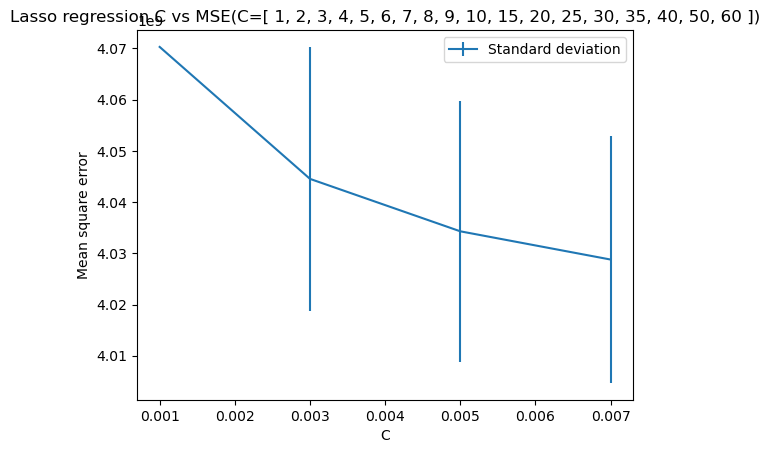

In [106]:
c_range = [0.001, 0.003, 0.005, 0.007]
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
mean_error = []; mse_temp = [];  std_error = []
for C in c_range:
    lasso_model = linear_model.Lasso(alpha = 1/(2*C))
    lasso_model.fit(X_Train, y_Train)
    ypred = lasso_model.predict(X_Test)
    mse = mean_squared_error(y_Test, ypred)
    mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())
plt.errorbar(c_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression C vs MSE(C=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60 ])')
plt.legend(['Standard deviation'])
plt.show()

In [107]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

LR_Model = LinearRegression()
LS_Model = Lasso(alpha = 1/(2*0.005))
R_Model = Ridge(alpha=1.5)
ALL_Model = [('Linear Regression', LR_Model),
    ('Lasso', LS_Model),
    ('Ridge', R_Model),      
]
for name_of_model, model in ALL_Model:
    scores = cross_val_score(model, available_ip, available_op, cv=cv) 
    #rg.fit(X_train,y_train)
    #pred = rg.predict(X_test)
    score = format(mean(scores), '.4f')
    print("{} : {}".format(name_of_model, score))

Linear Regression : 0.8087
Lasso : 0.8087
Ridge : 0.8088


# GradientBoostingRegressor

In [ ]:


scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = GradientBoostingRegressor(max_depth=5, n_estimators=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# LinearRegression

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# Lasso

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# DecisionTreeRegressor

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = DecisionTreeRegressor(max_depth=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# RandomForestRegressor

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = RandomForestRegressor()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# KNeighborsRegressor(n_neighbors=20)

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = KNeighborsRegressor(n_neighbors=10)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
reg_bg = BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, n_estimators=100),
                        n_estimators=20, random_state=0)
scores = cross_val_score(reg_bg, available_ip, available_op, cv=cv)
score = format(mean(scores), '.4f')
print(score)

In [16]:


X = available_ip.values
y = available_op.values




In [32]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = linear_model.Lasso(alpha = 1 / (2 * penalty))
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


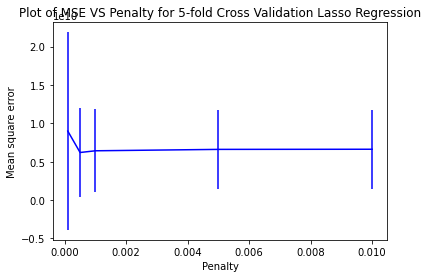

In [33]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [ ]:
penalty_parameters = [1, 5, 10, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [ ]:
penalty_parameters = [1, 5, 10, 20, 30, 50]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [ ]:
penalty_parameters = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [ ]:
penalty_parameters = [ 0.001, 0.005, 0.01, 0.05, 0.1]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

In [ ]:
c_range = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60]
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
mean_error = []; mse_temp = [];  std_error = []
for C in c_range:
    lasso_model = linear_model.Lasso(alpha = 1/(2*C))
    lasso_model.fit(X_Train, y_Train)
    print(lasso_model.coef_)
    ypred = lasso_model.predict(X_Test)
    mse = mean_absolute_error(y_Test, ypred)
    mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())
plt.errorbar(c_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression C vs MSE(C=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60 ])')
plt.legend(['Standard deviation'])
plt.show()

In [ ]:
feature_names = list(X-Train.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

In [ ]:
penalty = 9
lasso_model_dictionary = {}

lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])

lasso_model = linear_model.Lasso(alpha = 1 / (2 * penalty))
lasso_model.fit(X_Train, y_Train)

model_dict = {}
model_dict['Penalty'] = penalty
model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]

print(lasso_model.coef_)
for i in range(2,19) :
    model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]

lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)

model_eq_dict = {}
model_eq_dict['Penalty'] = penalty
equation_string = ''
for i in range(2,19) :
    coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
    if coeff != 0 : 
        equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '

equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
model_eq_dict['Model Equation'] = equation_string

lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)

lasso_model_dictionary[penalty] = lasso_model
lasso_model_params_df = lasso_model_params_df.style.set_properties(**{'text-align': 'left'})
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})

display(lasso_model_equation_df)

In [ ]:
arr = abs(lasso_model.coef_)
arr

In [3]:

X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)

In [4]:
feature_names = list(X_Train.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

In [34]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

In [35]:
lasso_model_dictionary = {}

lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(X_Train, y_Train)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2,19) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2,19) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})
lasso_model_equation_df = lasso_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(lasso_model_equation_df)

In [108]:
available_ip

Year  Month  Count  daily_mean_celsius  average_relative_hummidity  \
0     2010      1   54.0                 8.1                        62.6   
1     2010      2   54.0                 8.3                        48.8   
2     2010      3   54.0                10.2                        52.7   
3     2010      4   14.0                12.1                        54.1   
4     2010      5   14.0                14.8                        59.5   
...    ...    ...    ...                 ...                         ...   
1831  2022      5   21.0                14.8                        59.5   
1832  2022      6   21.0                17.6                        66.7   
1833  2022      7   21.0                19.5                        56.2   
1834  2022      8   21.0                19.2                        73.3   
1835  2022      9   21.0                17.0                        59.5   

      Country_Belgium  Country_France  Country_Germany  Country_Italy  \
0                   1               0                0              0   
1                   1               0                0              0   
2                   1               0                0              0   
3                   1               0                0              0   
4                   1               0                0              0   
...               ...             ...              ...            ...   
1831                0               0                0              0   
1832                0               0                0              0   
1833                0               0                0              0   
1834                0               0                0              0   
1835                0               0                0              0   

      Country_Netherlands  Country_Poland  Country_Portugal  Country_Spain  \
0                       0               0                 0              0   
1                       0               0                 0              0   
2                       0               0                 0              0   
3                       0               0                 0              0   
4                       0               0                 0              0   
...                   ...             ...               ...            ...   
1831                    0               0                 0              0   
1832                    0               0                 0              0   
1833                    0               0                 0              0   
1834                    0               0                 0              0   
1835                    0               0                 0              0   

      Country_Switzerland  Country_UAE  Country_UK  Country_US  
0                       0            0           0           0  
1                       0            0           0           0  
2                       0            0           0           0  
3                       0            0           0           0  
4                       0            0           0           0  
...                   ...          ...         ...         ...  
1831                    0            1           0           0  
1832                    0            1           0           0  
1833                    0            1           0           0  
1834                    0            1           0           0  
1835                    0            1           0           0  

[1836 rows x 17 columns]

In [109]:
available_ip = available_ip.drop(available_ip.columns[[8, 10, 11]], axis=1)
available_ip

Year  Month  Count  daily_mean_celsius  average_relative_hummidity  \
0     2010      1   54.0                 8.1                        62.6   
1     2010      2   54.0                 8.3                        48.8   
2     2010      3   54.0                10.2                        52.7   
3     2010      4   14.0                12.1                        54.1   
4     2010      5   14.0                14.8                        59.5   
...    ...    ...    ...                 ...                         ...   
1831  2022      5   21.0                14.8                        59.5   
1832  2022      6   21.0                17.6                        66.7   
1833  2022      7   21.0                19.5                        56.2   
1834  2022      8   21.0                19.2                        73.3   
1835  2022      9   21.0                17.0                        59.5   

      Country_Belgium  Country_France  Country_Germany  Country_Netherlands  \
0                   1               0                0                    0   
1                   1               0                0                    0   
2                   1               0                0                    0   
3                   1               0                0                    0   
4                   1               0                0                    0   
...               ...             ...              ...                  ...   
1831                0               0                0                    0   
1832                0               0                0                    0   
1833                0               0                0                    0   
1834                0               0                0                    0   
1835                0               0                0                    0   

      Country_Spain  Country_Switzerland  Country_UAE  Country_UK  Country_US  
0                 0                    0            0           0           0  
1                 0                    0            0           0           0  
2                 0                    0            0           0           0  
3                 0                    0            0           0           0  
4                 0                    0            0           0           0  
...             ...                  ...          ...         ...         ...  
1831              0                    0            1           0           0  
1832              0                    0            1           0           0  
1833              0                    0            1           0           0  
1834              0                    0            1           0           0  
1835              0                    0            1           0           0  

[1836 rows x 14 columns]

# Lasso Updated

In [110]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8026121185493906
1 --> 0.8105381307263058
2 --> 0.8132492015925229
3 --> 0.8138252273266972
4 --> 0.8157255612296481
5 --> 0.8127952027269348
6 --> 0.8138877781705006
7 --> 0.8155121583897819
8 --> 0.8144520592626424
9 --> 0.8150736905389815


# Linear Regression Updated

In [ ]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

# Ridge Regression Updated

In [112]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Ridge()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.811512853564009
1 --> 0.8122736090101966
2 --> 0.8057266819088216
3 --> 0.8070260519995042
4 --> 0.8115771377472367
5 --> 0.8074674786012795
6 --> 0.8073603645267768
7 --> 0.809707745919933
8 --> 0.8117518930570176
9 --> 0.8131448408510491
